In [167]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import pickle
import time

# load data

In [168]:
with open('../data_pickle/resized64_train_data256.pickle', 'rb') as f :
    train = pickle.load(f)
with open('../data_pickle/resized64_valid_data256.pickle', 'rb') as f :
    valid = pickle.load(f)
with open('../data_pickle/resized64_test_data256.pickle', 'rb') as f :
    test = pickle.load(f)

In [169]:
X_train = np.array(train['train_data'])
Y_train = np.array(train['train_label'])
X_val = np.array(valid['valid_data'])
Y_val = np.array(valid['valid_label'])
X_test = np.array(test['test_data'])
Y_test = np.array(test['test_label'])

In [128]:
Y_test0 = np.array(test['test_label'])

In [165]:
# Normalization.
def custom_normalization(data, std, mean):
    return (data - mean) / std

mean, std = X_train.mean(), X_train.std()
X_train = custom_normalization(X_train, mean, std)
mean, std = X_val.mean(), X_val.std()
X_val = custom_normalization(X_val, mean, std)
mean, std = X_test.mean(), X_test.std()
X_test = custom_normalization(X_test, mean, std)

In [192]:
Y_train=to_categorical(Y_train, 50)
Y_val=to_categorical(Y_val, 50)
Y_test=to_categorical(Y_test, 50)

# define LeNet FC

In [20]:
def LeNet_5():
    model = Sequential()

    # C1: (None,64,64,3) -> (None,60, 60, 6).
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(64,64,3), padding='valid'))

    # P1: (None,60, 60, 6) -> (None,30, 30, 6).
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # C2: (None,30, 30, 6) -> (None, 26, 26, 16).
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

    # P2: (None, 26, 26, 16) -> (None,13, 13, 16).
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Flatten: (None,13, 13, 16) -> (None, 2704).
    model.add(Flatten())

    # FC1: (None, 2704) -> (None,1024).
    model.add(Dense(1024, activation='tanh'))

    # FC2: (None,1024) -> (None,256).
    model.add(Dense(256, activation='tanh'))

    # FC3: (None,256) -> (None,50).
    model.add(Dense(50, activation='softmax'))

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 
    
    return model

In [28]:
model=LeNet_5()
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [170]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
average_pooling2d_4 (Average (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2769920   
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [178]:
#from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model

In [180]:
#from tensorflow.keras.utils import plot_model
# https://blog.csdn.net/weixin_36407399/article/details/87890230
plot_model(model, to_file='model.png', show_shapes=True)


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [30]:
t1=time.time()
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)
t2=time.time()
# Save the model.
model.save("lenet5_model.h5")

Epoch 1/20
1979/1979 [==============================] - 54s 27ms/step - loss: 3.6521 - accuracy: 0.0767 - val_loss: 3.3792 - val_accuracy: 0.1200
Epoch 2/20
1979/1979 [==============================] - 54s 27ms/step - loss: 3.3172 - accuracy: 0.1443 - val_loss: 3.2990 - val_accuracy: 0.1444
Epoch 3/20
1979/1979 [==============================] - 54s 27ms/step - loss: 3.2103 - accuracy: 0.1619 - val_loss: 3.1939 - val_accuracy: 0.1733
Epoch 4/20
1979/1979 [==============================] - 54s 27ms/step - loss: 3.1316 - accuracy: 0.1827 - val_loss: 3.1595 - val_accuracy: 0.1644
Epoch 5/20
1979/1979 [==============================] - 53s 27ms/step - loss: 3.0505 - accuracy: 0.1967 - val_loss: 3.1117 - val_accuracy: 0.1800
Epoch 6/20
1979/1979 [==============================] - 52s 26ms/step - loss: 2.9749 - accuracy: 0.2185 - val_loss: 3.1107 - val_accuracy: 0.1511
Epoch 7/20
1979/1979 [==============================] - 50s 25ms/step - loss: 2.9067 - accuracy: 0.2303 - val_loss: 3.0839 -

In [31]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])



Plot of training error over 20 epochs:


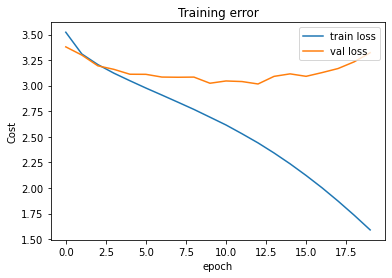

In [32]:
# Plot training error.
print('\nPlot of training error over 20 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()


Plot of training accuracy over 20 epochs:


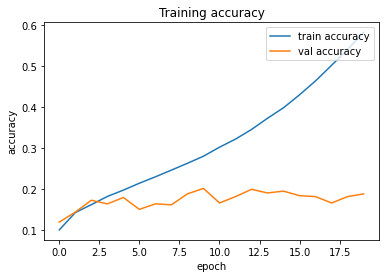

In [188]:
# Plot training error.
print('\nPlot of training accuracy over 20 epochs:')
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy', 'val accuracy'], loc='upper right')
plt.show()

In [186]:
# Restore the model.
model = tf.keras.models.load_model('lenet5_model.h5')

# Make prediction.
predictions = model.predict(X_test)

# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

# Print test set accuracy.
print('Test set error rate: {:.6}'.format(np.mean(y_pred == Y_test0)))

Test set error rate: 0.0577778


In [193]:
test_preds = model.evaluate(X_test,Y_test)

15/15 [==============================] - 0s 7ms/step - loss: 4.7033 - accuracy: 0.0578


In [195]:
test_preds
print("Test loss="+str(test_preds[0]))
print("Test accuracy="+str(test_preds[1]))

Test loss=4.703296661376953
Test accuracy=0.057777777314186096


In [199]:
# def accuracy(predicted, t ):
#     accuracy = np.mean(t==predicted) 
#     return accuracy

In [198]:
# accuracy = accuracy(y_pred, Y_test0 )
# accuracy

In [197]:
# X_test0 = np.transpose(X_test,(0,3,1,2))
# X_test0.shape

In [159]:
# def plot_example(X, y, y_pred=None):
#     """
#     展示9个训练样本及其各自类别
#     Parameters:
#     -X: 训练样本
#     -y: 真实标签
#     -y_pred: 预测标签
#     """
#     # 3*3的显示阵列
#     fig,axes = plt.subplots(3, 3)
#     fig.subplots_adjust(hspace=0.3, wspace=0.3)

#     X,y=X[:9, ..., :], y[:9] 
#     #X = np.transpose(X,(0,3,1,2))
#     mean, std = X_test.mean(), X_test.std()
#     #print(mean, std)
    
#     #X = np.transpose(X,(2, 0, 1))
    
#     for i, ax in enumerate(axes.flat):
#         # Plot image.
#         #X[i] = np.transpose(X[i],(2, 0, 1))
#         #print((X[i]*std + mean).shape)
#         #ax[idx].imshow(cv2.cvtColor(vactor, cv2.COLOR_BGR2RGB))
#         ax.imshow((X[i]*std + mean))

#         # Show true and predicted classes.
#         if y_pred is None:
#             xlabel = "True: {0}".format(y[i])
#         else:
#           # 显示预测结果
#             xlabel = "True: {0}, Pred: {1}".format(y[i], y_pred[i])

#         # Show the classes as the label on the x-axis.
#         ax.set_xlabel(xlabel)

#         # Remove ticks from the plot.
#         ax.set_xticks([])
#         ax.set_yticks([])
#     # Ensure the plot is shown correctly with multiple plots in a single Notebook cell.
#     plt.show()


In [160]:
# def plot_example_errors(X, y, y_pred):
#     """
#     Plots 9 example errors and their associate true/predicted labels.
#     Parameters:
#     -X: Training examples.
#     -y: true labels.
#     -y_pred: predicted labels.
    
#     """
#     incorrect = (y != y_pred)
#     X = X[incorrect]
#     y = y[incorrect]
#     y_pred = y_pred[incorrect]

#     # Plot the first 9 images.
#     plot_example(X, y, y_pred)


In [162]:
# import cv2

In [196]:
# # Restore the model.
# model = tf.keras.models.load_model('lenet5_model.h5')

# # Make prediction.
# predictions = model.predict(X_test)

# # Retrieve predictions indexes.
# y_pred = np.argmax(predictions, axis=1)

# # Print test set accuracy.
# print('Test set error rate: {:.6}'.format(np.mean(y_pred == Y_test0)))

# # Plot some examples with model predictions.
# print('\nSome correct classification:')
# plot_example(X_test, Y_test0, y_pred)

# # print('\nSome incorrect classification:')
# # plot_example_errors(X_test, Y_test0, y_pred)

